In [41]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_excel("TDCA_Q1_Data_.XLSX", sheet_name="Sheet2")
df.head()

,CarTrips,NonCarTrips
0,89.320,10.750
1,5.267,14.848
2,14.301,11.346
3,18.683,8.723
4,8.072,9.318


### Question 1

#### a)
For both CAR and NOCAR data, compute the sample mean, median,
standard deviation and skewness (stating which skewness definition
or formula you used). Comment on the distribution of the data sets,
referring both to the histogram and summary statistics. 

In [10]:
df.describe()

,CarTrips,NonCarTrips
count,101.000000,81.000000
mean,11.720594,8.299543
std,9.883022,3.901166
min,1.914000,0.000000
25%,6.416000,5.913000
50%,9.374000,7.254000
75%,14.301000,10.451000
max,89.320000,25.530000


array([[<AxesSubplot:title={'center':'CarTrips'}>,
        <AxesSubplot:title={'center':'NonCarTrips'}>]], dtype=object)

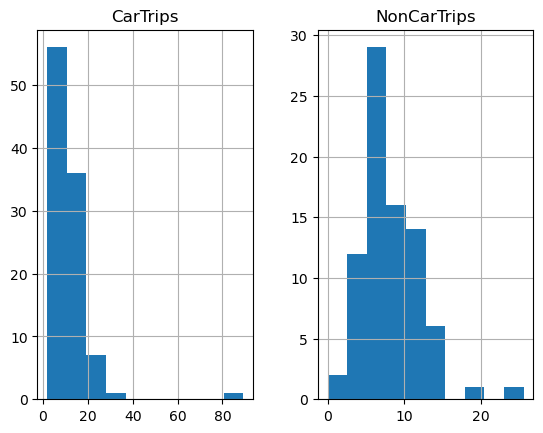

In [13]:
df.hist()

The data CarTrips data is distributed abnormally with most data aligning between 0 and 20 whilie some other data is distributed along 80 to 100. On the other hand, the NonCarTrips data is normally distributed since it has a symetric shape along with most data concentrated around the mean.
The mean of the CarTrips data is 11.720594	while that of the NonCarTrips data is 8.299543.
The formula used in this exploration is the hist() formula of the pandas library which is used to create histograms of all the columns in the dataframe, in this case 2. The descriptive statistics on the other hand, were produced by calling the describe() function of the pandas dataframe which produces statistical data on the dataset.

### b
Do there appear to be any outliers or erroneous data points? If yes,
explain how you identified them and why such observations might
have been recorded. Remove them from the data and re-compute the
summary statistics before continuing to the remainder of the question

In [15]:
import scipy.stats as stats

In [20]:
df.isna().sum()
df = df.dropna() # remove missing values

In [33]:
dfzscore = stats.zscore(df)
df1 = dfzscore.loc[(dfzscore['CarTrips'] > 3) | (dfzscore['NonCarTrips']> 3)] #selecting outliers where zscore is more than threshold
df1 # the outliers
# dfzscore

,CarTrips,NonCarTrips
0,7.546395,0.632048
61,-0.342302,4.444265


In [35]:
# Remove the outliers
df1 = df.loc[(dfzscore['CarTrips'] <= 3) | (dfzscore['NonCarTrips']<= 3)] #selecting outliers where zscore is less than threshold
df1

,CarTrips,NonCarTrips
0,89.320,10.750
1,5.267,14.848
2,14.301,11.346
3,18.683,8.723
4,8.072,9.318
...,...,...
76,6.782,5.745
77,26.865,4.554
78,6.416,9.414
79,12.611,4.190


From the observation above, the dataset has outliers. That is, the distance of each data point from the mean of the dataset in terms of standard deviation is more than 3 for 76 records. The last block of code removes the outliers by ensuring all the datapoints have a zscore that is smaller than the threashold, which is 3 in this case.

### Descriptive statistics After removing outliers

In [36]:
df1.describe()

,CarTrips,NonCarTrips
count,81.000000,81.000000
mean,11.891148,8.299543
std,10.324305,3.901166
min,1.914000,0.000000
25%,7.210000,5.913000
50%,9.884000,7.254000
75%,13.837000,10.451000
max,89.320000,25.530000


The summary shows a mean of 11.89 on Cartrips and 8.299 on NonCarTrips

### c
Estimate a 95% confidence interval for the true mean commuting
distance by CAR (you do not need to estimate for NOCAR). State any
assumptions you make and explain the relevance of the central limit
theorem. 

In [37]:
from scipy import stats
import numpy as np

In [42]:
# Estimate 95% confidence interval on the true mean
confidence_interval = stats.t.interval(alpha = 0.95,              # Confidence level
                                      df = len(df1) - 1,       # Degrees of freedom
                                      loc = np.mean(df1['CarTrips']),      # Sample mean
                                      scale = stats.sem(df1['CarTrips']))  # Standard error of the mean

print("95% Confidence interval: ", confidence_interval)

95% Confidence interval:  (9.608256938253753, 14.174039358042556)


The output of the above block is a tuple of two values representing the lower and upper bounds of the 95% confidence interval on the true mean. The assumptions made when calculating the 95% confidence interval on the true mean are:
i) Independence: The data points in the sample should be independent of each other. This means that the value of one data point should not affect the value of another data point.

ii) Normality: The data should be approximately normally distributed. This assumption is necessary to use the t-distribution to estimate the confidence interval.

### d
Use a statistical test to decide whether these data give evidence that
the mean commuting distance by car is different from the mean
commuting distance by other modes. State any assumptions you make. Interpret your findings to be understandable by an intelligent
non-expert.

In [43]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(df1['CarTrips'], df1['NonCarTrips'])

print("T-Statistic: ", t_stat)
print("P-Value: ", p_value)

T-Statistic:  2.928794889123745
P-Value:  0.00389989205591096


The t-statistic is a measure of the difference between the means of the two groups. The p-value is the probability of obtaining a t-statistic as extreme or more extreme than the one calculated, under the assumption that the means of the two groups are equal.
The low p-value (0.003) indicates that there is strong evidence to suggest that the means of the two groups are different.

## Question 2
An attitudinal survey was conducted among peak-time rail commuters arriving in Leeds
and in Manchester, to understand their views on levels of crowding on services following
the lifting of Covid-19 restrictions. The resulting data are provided in the “TDCA OTLA Jan
2023 Attitudinal survey.xlsx” file.
### a)
Use a suitable test to determine whether the attitudes appear to be
independent of the location (i.e. whether arriving in Leeds or
Manchester).

In [61]:
df = pd.read_excel("TDCA OTLA Jan 2023 Attitudinal survey.xlsx")
df.head()

,Unnamed: 0,Over-crowded,Busy but not over-crowded,Lightly crowded,Not crowded
0,Leeds,29,23,13,2
1,Manchester,91,45,9,6


In [62]:
list(df)
df.rename(columns ={"Unnamed: 0": 'Location'}, inplace=True) # renaming the column
df.head()

,Location,Over-crowded,Busy but not over-crowded,Lightly crowded,Not crowded
0,Leeds,29,23,13,2
1,Manchester,91,45,9,6


In [63]:
df['Location'] = df.apply(lambda x: 10 if x['Location'] == 'Manchester' else (-10), axis =1 )
df

,Location,Over-crowded,Busy but not over-crowded,Lightly crowded,Not crowded
0,-10,29,23,13,2
1,10,91,45,9,6


In [64]:
df.corr() 

,Location,Over-crowded,Busy but not over-crowded,Lightly crowded,Not crowded
Location,1.0,1.0,1.0,-1.0,1.0
Over-crowded,1.0,1.0,1.0,-1.0,1.0
Busy but not over-crowded,1.0,1.0,1.0,-1.0,1.0
Lightly crowded,-1.0,-1.0,-1.0,1.0,-1.0
Not crowded,1.0,1.0,1.0,-1.0,1.0


The code above shows the correlation of the variables in the attitudinal survey data in Manchester and Leeds. An observation that a strong relation exist between attitudes and location.

In [67]:
from scipy import stats
cols = list(df)
cols.remove('Location')
cols

['Over-crowded', 'Busy but not over-crowded', 'Lightly crowded', 'Not crowded']

In [69]:

# Perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['Location'], df['Over-crowded']))

print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)

Chi-Square Statistic:  0.0
P-Value:  1.0


After carrying out the chi-squared statistic, a p-value of 1 was obtained. This means that there is not enough that the overcrowding is dependent on the location.

### b)
Identify any potential problems with applying the test in 2(a) and
suggest a resolution (you do not need to repeat the test).


1) Weak association: If the variables being tested have a weak association, the chi-square statistic will be low and the p-value will be high, indicating that there is not enough evidence to suggest that the variables are dependent.

2) Violation of assumptions: The chi-square test assumes that the sample size of each cell is large enough and the variables are independent. If these assumptions are not met, the chi-square test may not be appropriate and the p-value may not be accurate.

3) Multiple testing: When performing multiple chi-square tests, the chance of obtaining a false positive (i.e. rejecting the null hypothesis when it is true) increases. To account for this, you can use a correction for multiple testing, such as the Bonferroni correction, which adjusts the p-value threshold for the number of tests performed.

4) The sample size is not large enough to detect the difference between observed and expected frequencies, in this case, the chi-square statistic will be low and the p-value will be high, indicating that there is not enough evidence to suggest that the variables are dependent.



## Question 3

Results from the 2021 Leeds travel to work survey showed that over 35% of the
respondents travel to work by car with a single occupant, while less than 10% use buses
as their main transport mode. Leeds City Council (LCC) is considering investing to
improve the performance of the bus network in the city and wants to know which
improvements (e.g. in reliability, headway and/or network coverage) are more urgently
needed. To fulfil this task, you are asked to:
### a)
Devise a data collection plan that details the data to be collected, and
what would be the most appropriate method(s) to collect it. 

The following data collection plan is suggested in order to aid in improving performance
1) Research question: The aim of this research is to collect enough data about the vehicles and the buses in order to come up with a better and reliable network coverage in the transport sector.

2) Sampling design: The sampling design should be outlined, including the sample size, sampling method, and the criteria for inclusion and exclusion. The sampling design will involve use of CCTV footages to record the number of vehicles accessing all the roads. This data will be esential. A large dataset should be collected of around 2000 vehicles in different locations and their time of accessing the roads. 

3) Data Collection method: The primary data source should be used. That is, the data should be obtained directly from video capture by the CCTV footages along the roads. Their time of capture should also be recorded and also whether it's a bus or a personal car. In facilitation to this process, A software should be integrated in the CCTV server rooms that is able to categorize vehicles as either personal cars or buses and store their records in a database. Preferably a cloud storage so that all systems could be linked together and the retrieval of the data be made easier and accessible from a single point.


### b)
How would you analyse the data, and how can the results from your
analysis be used by LCC? Specify statistical techniques relevant to your
proposed analysis.

This data will be analyzed using python programming language which offers many libraries that aid in the field of statistical analysis. The data captured would consist of; days of the week, date, type of vehicle, speed of vehicle,  location/road where captured, time of day, and whether incoming or outgoing (the direction the captured vehicles were moving).
The statistical techniques will involve:
i) grouping of data - this is where data will be grouped by time and roads to facilitate analysis of usage per roads at particular hours.
ii) Standardization of the data and scaling it so that all records in a certain road are averaged and computed according to the min and max of the data.
iii) Correlation in order to find the significance of the variables to the target variable 'number-of-vehicles'.
iv) Use of a histogram and time series to visualize the roads usage.
v) Machine learning techniques to identify the conditions that bring about high/low traffic in Leeds.


### c) 
Discuss how the limitations of the data collection techniques in your plan
could affect the data quality and your analysis.

One limitation of the data collection technique is that the traffic may be congested and hence the software failing to identify the difference between personal vehicles and the buses. Another limitation may be data overflow or failure of the system while performing multiple classification using image recognition techniques which will lead to loss of data hence leading to data bias.

## Question 4
A large UK city is facing serious congestion and air quality issues and the council decides
to run a data collection to better understand how people commute, with the aim of
designing informed policies to encourage more sustainable mobility in the area. They have
decided to run a survey and have formulated the following survey question.

What transport modes do you use for commuting?
o Car/Van
o Bike
o Bus
o Scooter
o Carpoo

### a) 
Is this a good survey question? If not, why? How would you improve
it? Explain your answer

This question is vague since the quantity was not included in the question. The question can be improved by asking how often someone uses each or any of the transport methods per month/week. This way, the council can analyze the data more precisely since most people use a number of transport modes though not at the same scale

### b) 
What other information should the council collect as part of this
survey? Explain your answer.

The council should also include questions about whether the interviewee owns any of the transport modes. If so how often do they use it and how many people use it for commuting. This information can be used to come up with a plan or regulation after conducting analysis such that the people living in UK city could be warned against using different vehicles for transportation if they come from same location or homestead. This could largely reduce the traffic in the city of UK.

### c)
Propose a data collection protocol for this survey, including a target
population, recruitment strategy, modality of data collection, bias
limitation strategy, incentives, and timeline.

The data collection protocol that could be used in this survey could include distributing physical questionaires to a group of people at public meeting points such as restaurants, and picnic points. Moreover, a more suitable form of collection could be through network providers by providing forms such as google forms and giving tokens or to those who participate in order to encourage more participants. Social media could also be used to distribute links to online forms. For example, sharing of forms via Whatsapp and Twitter trends and facebook in order to reach more masses.